In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm 
from statsmodels.graphics.regressionplots import influence_plot
import warnings 
warnings . filterwarnings('ignore')

In [3]:
data=pd.read_csv('Startups.csv')
data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [6]:
data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [9]:
data.shape

(50, 5)

In [11]:
data.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [13]:
data.nunique()

R&D Spend          49
Administration     50
Marketing Spend    48
State               3
Profit             50
dtype: int64

In [15]:
data['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [17]:
data.State.value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [4]:
data.isnull

<bound method DataFrame.isnull of     R&D Spend  Administration  Marketing Spend       State     Profit
0   165349.20       136897.80        471784.10    New York  192261.83
1   162597.70       151377.59        443898.53  California  191792.06
2   153441.51       101145.55        407934.54     Florida  191050.39
3   144372.41       118671.85        383199.62    New York  182901.99
4   142107.34        91391.77        366168.42     Florida  166187.94
5   131876.90        99814.71        362861.36    New York  156991.12
6   134615.46       147198.87        127716.82  California  156122.51
7   130298.13       145530.06        323876.68     Florida  155752.60
8   120542.52       148718.95        311613.29    New York  152211.77
9   123334.88       108679.17        304981.62  California  149759.96
10  101913.08       110594.11        229160.95     Florida  146121.95
11  100671.96        91790.61        249744.55  California  144259.40
12   93863.75       127320.38        249839.44     Flori

In [7]:
df=data.rename({'R&D Spend':'RDS','Administration':'Admin','Marketing Spend':'MKS'},axis=1)
df.head(5)

,RDS,Admin,MKS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [8]:
df[df.duplicated()]

,RDS,Admin,MKS,State,Profit


In [9]:
df.corr()

,RDS,Admin,MKS,Profit
RDS,1.000000,0.241955,0.724248,0.972900
Admin,0.241955,1.000000,-0.032154,0.200717
MKS,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


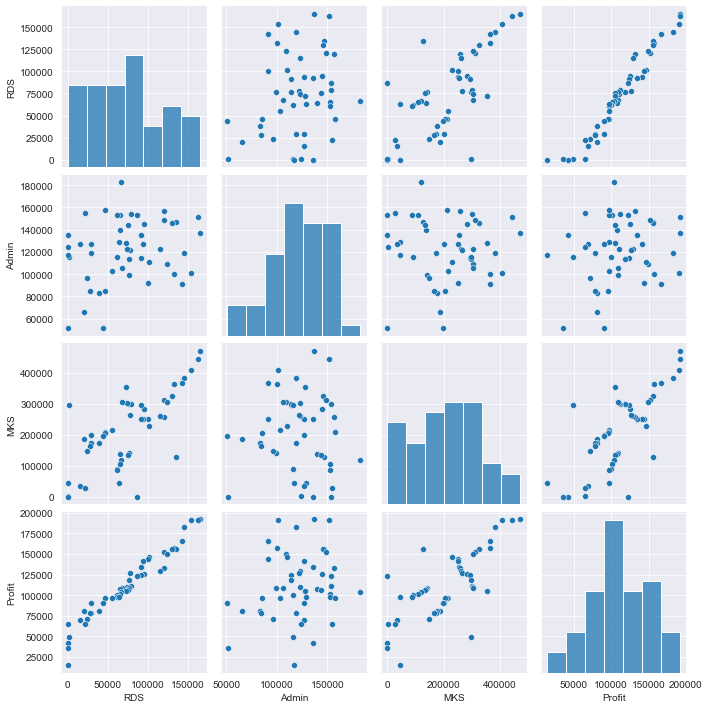

In [10]:
sns.set_style(style='darkgrid')
sns.pairplot(df)

<AxesSubplot:xlabel='RDS', ylabel='Density'>

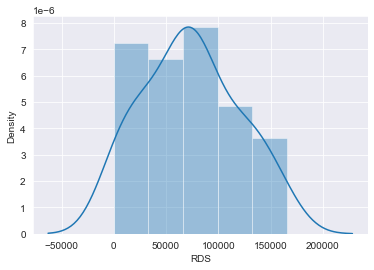

In [11]:
sns.distplot(df['RDS'])

<AxesSubplot:xlabel='Admin', ylabel='Density'>

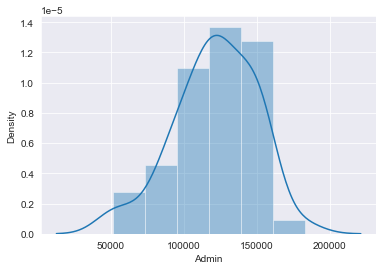

In [12]:
sns.distplot(df['Admin'])

<AxesSubplot:xlabel='MKS', ylabel='Density'>

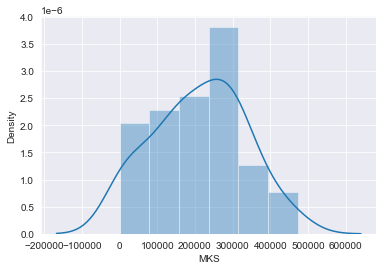

In [13]:
sns.distplot(df['MKS'])

<AxesSubplot:xlabel='Profit', ylabel='Density'>

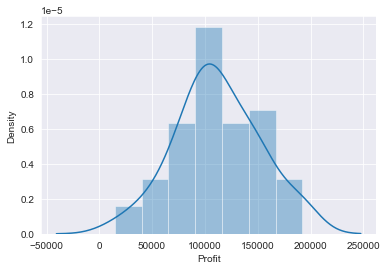

In [14]:
sns.distplot(df['Profit'])

In [15]:
model = smf.ols('Profit~RDS+Admin+MKS',data=df).fit()

In [16]:
model.params

Intercept    50122.192990
RDS              0.805715
Admin           -0.026816
MKS              0.027228
dtype: float64

In [17]:
print(np.round(model.pvalues,5),'\n',np.round(model.tvalues,5))

Intercept    0.00000
RDS          0.00000
Admin        0.60176
MKS          0.10472
dtype: float64 
 Intercept     7.62622
RDS          17.84637
Admin        -0.52551
MKS           1.65508
dtype: float64


In [18]:
(model.rsquared,model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

In [19]:
slr = smf.ols('Profit~Admin',data=df).fit()
print (slr.pvalues,'/n',slr.tvalues)

Intercept    0.003824
Admin        0.162217
dtype: float64 /n Intercept    3.040044
Admin        1.419493
dtype: float64


In [23]:
slr_m = smf.ols('Profit~MKS',data = df).fit()
print (slr_m.pvalues,'/n',slr_m.tvalues)

Intercept    4.294735e-10
MKS          4.381073e-10
dtype: float64 /n Intercept    7.808356
MKS          7.802657
dtype: float64


In [24]:
mlr_am=smf.ols('Profit~Admin+MKS',data= df).fit()
print (mlr_am.pvalues,'\n',mlr_am.tvalues)

Intercept    2.589341e-01
Admin        1.729198e-02
MKS          9.727245e-11
dtype: float64 
 Intercept    1.142741
Admin        2.467779
MKS          8.281039
dtype: float64


In [25]:
mlr_am.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     36.71
Date:                Sun, 03 Apr 2022   Prob (F-statistic):           2.50e-10
Time:                        14:22:10   Log-Likelihood:                -577.13
No. Observations:                  50   AIC:                             1160.
Df Residuals:                      47   BIC:                             1166.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.022e+04   1.77e+04      1.143      0.259   -1.54e+04    5.58e+04
Admin          0.3237      0.131      2.468      0.017       0.060       0.588
MKS            0.2488      0.030      8.281      0.000       0.188       0.309
==============================================================================
Omnibus:                        6.584   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                6.524
Skew:                          -0.512   Prob(JB):                       0.0383
Kurtosis:                       4.443   Cond. No.                     1.30e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
rsq_r = smf.ols("RDS~Admin+MKS",data =df).fit().rsquared
vif_r=1/(1-rsq_r)

rsq_a= smf.ols("Admin~RDS+MKS",data = df).fit().rsquared
vif_a=1/(1-rsq_a)

rsq_m =smf.ols("MKS~+Admin+RDS",data=df).fit().rsquared
vif_m=1/(1-rsq_m)

In [33]:
d1={'Variables':['RDS','Admin','MKS'],'Vif':[vif_r,vif_a,vif_m]}
Vif_df=pd.DataFrame(d1)
Vif_df

,Variables,Vif
0,RDS,2.468903
1,Admin,1.175091
2,MKS,2.326773


In [34]:
model.resid

0      -259.422890
1      2635.291768
2      8903.110904
3      9205.289974
4     -5951.574183
5     -6589.660571
6     -1991.586669
7     -4268.763048
8       470.070301
9     -5124.724110
10    10612.933633
11     8685.687039
12    12447.465818
13     6819.358337
14   -16945.996335
15   -16318.119985
16    10077.524599
17    -4822.077208
18    -4747.326806
19     7141.643633
20     1834.360769
21    -6006.431640
22    -4354.731717
23    -1262.625221
24    -4810.926113
25     5166.614935
26    -4867.035350
27    -9399.761457
28     1622.353995
29     -790.343452
30      485.217064
31     -204.296276
32    -1573.488985
33    -1136.087805
34     7673.526259
35     5967.910432
36    15422.015415
37      329.602292
38    11531.629352
39    -2723.251977
40     3423.956009
41     2996.273761
42      878.078179
43     9591.940037
44      588.975084
45    17275.430313
46    -6675.456853
47    -3930.858983
48   -13497.978158
49   -33533.734111
dtype: float64

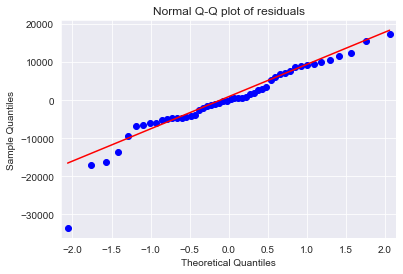

In [35]:
qqplot=sm.qqplot(model.resid,line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [36]:
list(np.where(model.resid>15000))

[array([36, 45], dtype=int64)]

In [37]:
list(np.where(model.resid<-30000))

[array([49], dtype=int64)]

In [38]:
df['Predicted'] =model.fittedvalues
df['Error']= model.resid
df

,RDS,Admin,MKS,State,Profit,Predicted,Error
0,165349.20,136897.80,471784.10,New York,192261.83,192521.252890,-259.422890
1,162597.70,151377.59,443898.53,California,191792.06,189156.768232,2635.291768
2,153441.51,101145.55,407934.54,Florida,191050.39,182147.279096,8903.110904
3,144372.41,118671.85,383199.62,New York,182901.99,173696.700026,9205.289974
4,142107.34,91391.77,366168.42,Florida,166187.94,172139.514183,-5951.574183
5,131876.90,99814.71,362861.36,New York,156991.12,163580.780571,-6589.660571
6,134615.46,147198.87,127716.82,California,156122.51,158114.096669,-1991.586669
7,130298.13,145530.06,323876.68,Florida,155752.60,160021.363048,-4268.763048
8,120542.52,148718.95,311613.29,New York,152211.77,151741.699699,470.070301
9,123334.88,108679.17,304981.62,California,149759.96,154884.684110,-5124.724110


<AxesSubplot:xlabel='Error'>

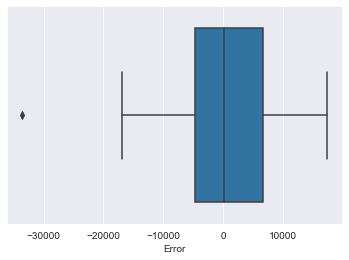

In [40]:
sns.boxplot(df['Error'])

<AxesSubplot:xlabel='Error', ylabel='Count'>

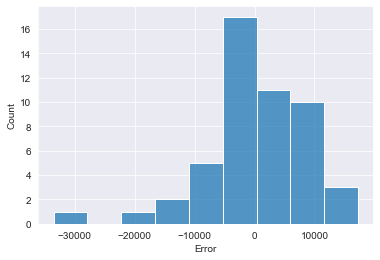

In [41]:
sns.histplot(df['Error'])

In [42]:
def standard_values(vals) : return (vals-vals.mean())/vals.std()

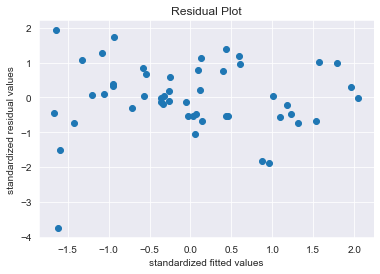

In [43]:
plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show()

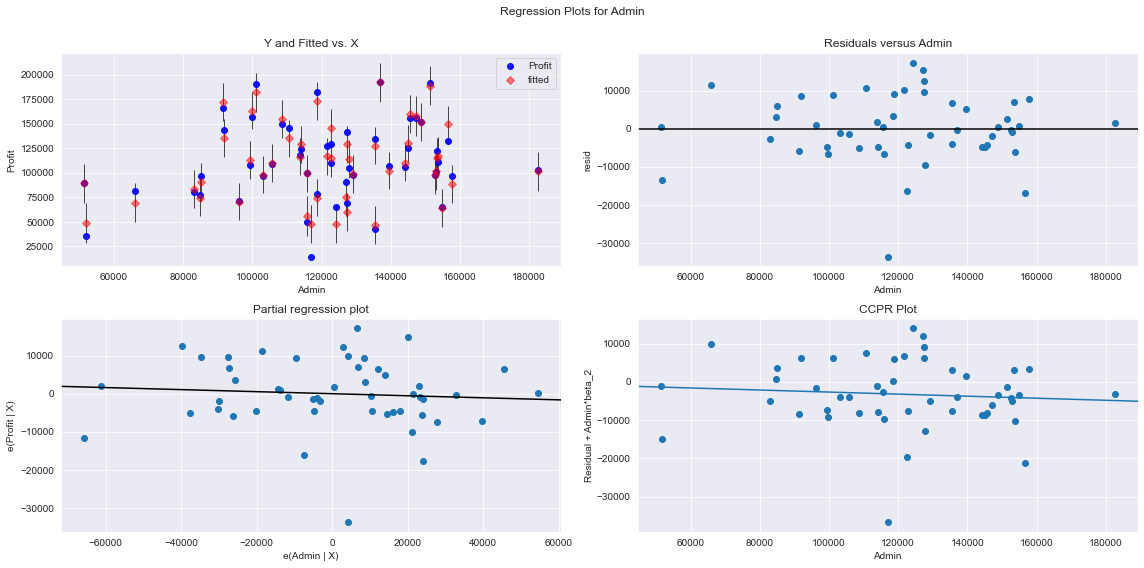

In [44]:
fig=plt.figure(figsize=(16,8))
sm.graphics.plot_regress_exog(model, 'Admin', fig=fig)
plt.show()

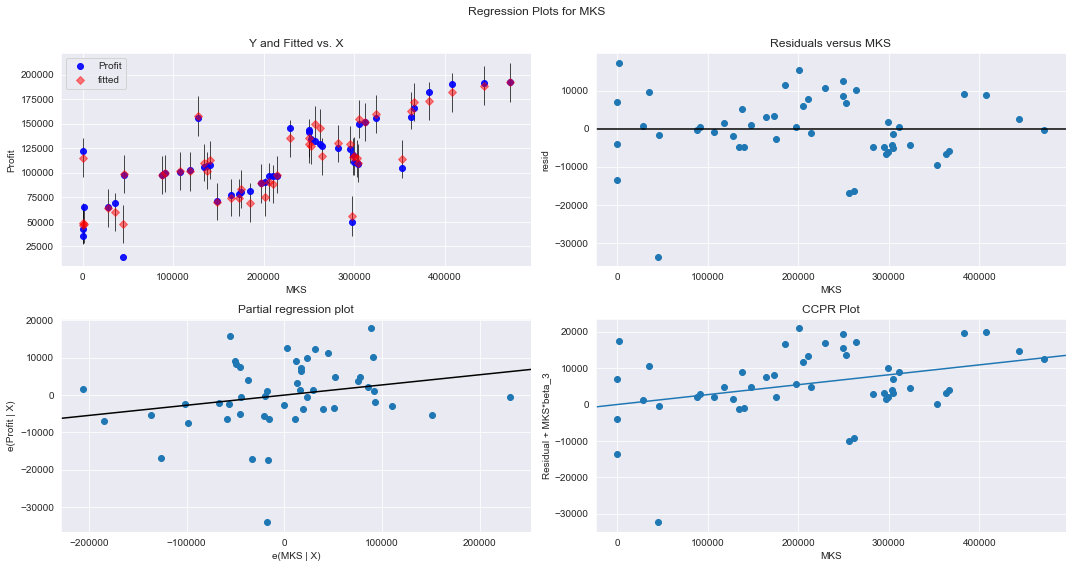

In [45]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model, 'MKS', fig=fig)
plt.show()

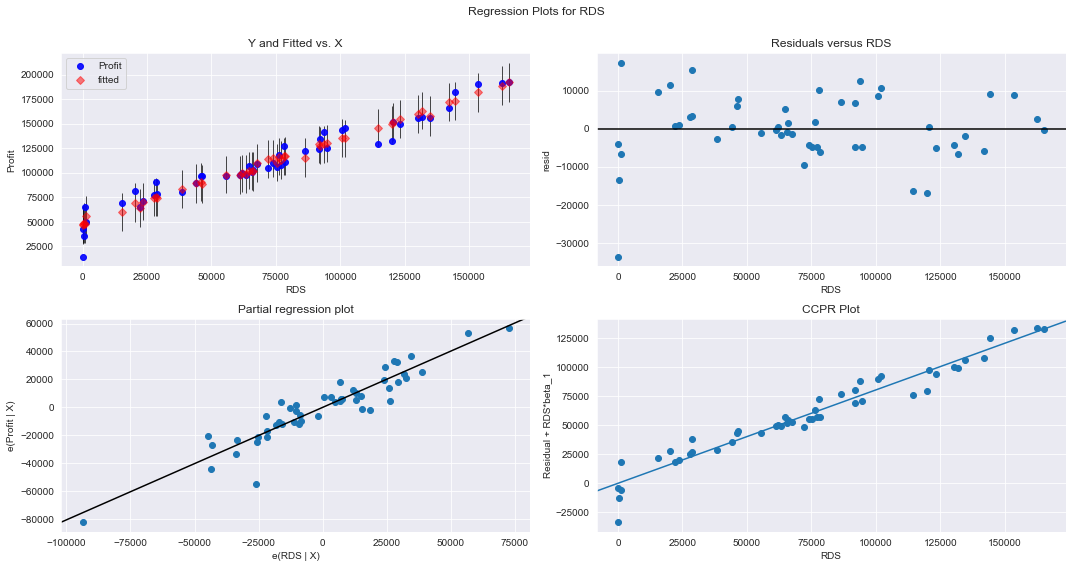

In [46]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model, 'RDS', fig=fig)
plt.show()

In [47]:
(c,_)=model.get_influence().cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

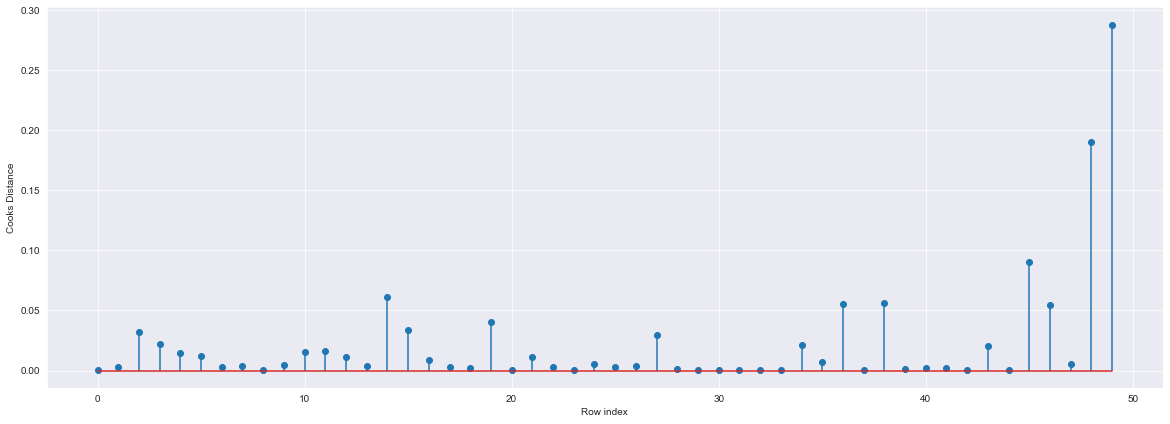

In [48]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df)), np.round(c, 5))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [50]:
np.argmax(c) ,np.max(c)

(49, 0.28808229275432634)

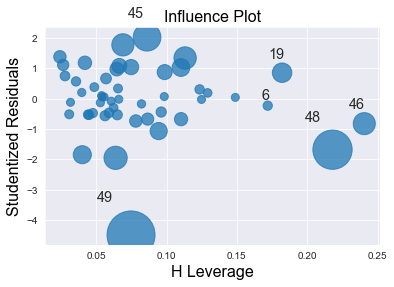

In [52]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [53]:
k = df.shape[1]
n = df.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.48

In [54]:
df[df.index.isin([49])]

,RDS,Admin,MKS,State,Profit,Predicted,Error
49,0.0,116983.8,45173.06,California,14681.4,48215.134111,-33533.734111


In [56]:
df2=df.drop(df.index[[49]],axis=0).reset_index(drop = True)
df2

,RDS,Admin,MKS,State,Profit,Predicted,Error
0,165349.20,136897.80,471784.10,New York,192261.83,192521.252890,-259.422890
1,162597.70,151377.59,443898.53,California,191792.06,189156.768232,2635.291768
2,153441.51,101145.55,407934.54,Florida,191050.39,182147.279096,8903.110904
3,144372.41,118671.85,383199.62,New York,182901.99,173696.700026,9205.289974
4,142107.34,91391.77,366168.42,Florida,166187.94,172139.514183,-5951.574183
5,131876.90,99814.71,362861.36,New York,156991.12,163580.780571,-6589.660571
6,134615.46,147198.87,127716.82,California,156122.51,158114.096669,-1991.586669
7,130298.13,145530.06,323876.68,Florida,155752.60,160021.363048,-4268.763048
8,120542.52,148718.95,311613.29,New York,152211.77,151741.699699,470.070301
9,123334.88,108679.17,304981.62,California,149759.96,154884.684110,-5124.724110


In [62]:
model2=smf.ols("Profit~RDS+Admin+MKS",data=df2).fit()

In [63]:
while model2.rsquared < 0.99:
    for c in [np.max(c)>1]:
        model2=smf.ols("Profit~RDS+Admin+MKS",data=df2).fit()
        (c,_)=model2.get_influence().cooks_distance
        c
        np.argmax(c) , np.max(c)
        df2=df2.drop(df2.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
        df2
    else:
        final_model=smf.ols("Profit~RDS+Admin+MKS",data=df2).fit()
        final_model.rsquared , final_model.aic
        print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.9626766170294073
Thus model accuracy is improved to 0.9614129113440602
Thus model accuracy is improved to 0.962593650298269
Thus model accuracy is improved to 0.9638487279209415
Thus model accuracy is improved to 0.9663901957918793
Thus model accuracy is improved to 0.9706076169779905
Thus model accuracy is improved to 0.9727840588916423
Thus model accuracy is improved to 0.9734292907181952
Thus model accuracy is improved to 0.9785801571833451
Thus model accuracy is improved to 0.9777383743090916
Thus model accuracy is improved to 0.9790510088977512
Thus model accuracy is improved to 0.9790004461890552
Thus model accuracy is improved to 0.9807878666153609
Thus model accuracy is improved to 0.9838299343609735
Thus model accuracy is improved to 0.9831149926392769
Thus model accuracy is improved to 0.9833768520972176
Thus model accuracy is improved to 0.9878892536376698
Thus model accuracy is improved to 0.9877191935547199
Thus model accuracy is improv

In [64]:
final_model.rsquared

0.9882757054424702

In [65]:
new_data=pd.DataFrame({'RDS':65000,"Admin":80000,"MKS":125000},index=[0])
new_data

,RDS,Admin,MKS
0,65000,80000,125000


In [66]:
final_model.predict(new_data)

0    100425.992609
dtype: float64

In [68]:
pred_y=final_model.predict(df2)
pred_y

0     165589.539700
1     158552.826483
2     156789.000710
3     149524.698853
4     150122.356712
5     126598.769555
6     130104.785747
7     127878.387928
8     117298.757074
9     111329.242429
10    110009.916133
11    102331.717613
12    109661.804131
13    103462.767086
14    101874.612012
15     97655.794577
16     97872.919535
17     96858.382686
18     98654.449007
19     93583.600868
20     91186.568204
21     88571.938968
22     84521.312916
23     78528.002935
24     76670.262623
25     73237.524757
26     68075.710756
dtype: float64

In [69]:
d_fin={'Prep_Models':['Model', 'Final_Model'], 'Rsquared':[model.rsquared, final_model.rsquared]}
table=pd.DataFrame(d_fin)
table

,Prep_Models,Rsquared
0,Model,0.950746
1,Final_Model,0.988276


In [70]:
d2={'Prep_Models':['Model','Final_Model'],'Rsquared':[model.rsquared,final_model.rsquared]}
table=pd.DataFrame(d2)
table

,Prep_Models,Rsquared
0,Model,0.950746
1,Final_Model,0.988276
